In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
original_population_file = "Resources/population_growth_rate.csv"
original_population_data_df = pd.read_csv(original_population_file)

In [4]:
original_gdp_file = "Resources/gdp_per_capita.csv"
original_gdp_data_df = pd.read_csv(original_gdp_file)

In [5]:
original_happiness_2015_file = "Resources/world_happiness_report_2015.csv"
original_happiness_2016_file = "Resources/world_happiness_report_2016.csv"
original_happiness_2017_file = "Resources/world_happiness_report_2017.csv"
original_happiness_2018_file = "Resources/world_happiness_report_2018.csv"
original_happiness_2019_file = "Resources/world_happiness_report_2019.csv"

original_happiness_2015_data_df = pd.read_csv(original_happiness_2015_file)
original_happiness_2016_data_df = pd.read_csv(original_happiness_2016_file)
original_happiness_2017_data_df = pd.read_csv(original_happiness_2017_file)
original_happiness_2018_data_df = pd.read_csv(original_happiness_2018_file)
original_happiness_2019_data_df = pd.read_csv(original_happiness_2019_file)

In [6]:
population_data_df = original_population_data_df[['name_long', 'POP_GROWTH_RT','YEAR']].copy()
population_data_df = population_data_df.rename(columns={"name_long": "country",
                                                          "POP_GROWTH_RT": "PGR",
                                                          "YEAR": "year"})
population_data_df.drop_duplicates("country", inplace=True)
population_data_df.set_index("country", inplace=True)

population_data_df.head()

,PGR,year
country,,
Aruba,3.134888,1960
Afghanistan,1.813677,1960
Angola,1.803005,1960
Anguilla,NaN,1960
Albania,3.015423,1960


In [7]:
gdp_data_df = original_gdp_data_df[['Country', '2014','2015','2016','2017','2018']].copy()
gdp_data_df = gdp_data_df.rename(columns={"Country": "country"})
gdp_data_df.drop_duplicates("country", inplace=True)
gdp_data_df.set_index("country", inplace=True)
# gdp_data_df[gdp_data_df['2014'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2015'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2016'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2017'].apply(lambda x: str(x).isdigit())]
# gdp_data_df[gdp_data_df['2018'].apply(lambda x: str(x).isdigit())]
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2014']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2015']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2016']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2017']=='..'].index, inplace=True)
gdp_data_df.drop(gdp_data_df.loc[gdp_data_df['2018']=='..'].index, inplace=True)
#gdp_data_df = pd.to_numeric(gdp_data_df["2018"], downcast="float")

gdp_data_df["2014"] = pd.to_numeric(gdp_data_df["2014"], downcast="float")
gdp_data_df["2015"] = pd.to_numeric(gdp_data_df["2015"], downcast="float")
gdp_data_df["2016"] = pd.to_numeric(gdp_data_df["2016"], downcast="float")
gdp_data_df["2017"] = pd.to_numeric(gdp_data_df["2017"], downcast="float")
gdp_data_df["2018"] = pd.to_numeric(gdp_data_df["2018"], downcast="float")


#gdp_data_df.to_csv('out.csv')
# gdp_data_clean =pd.DataFrame()
#print(len(gdp_data_df))
# for i,row in gdp_data_df.iterrows():
#     try: 
#         gdp_data_clean[i] = pd.to_numeric(row, downcast="float")
#     except: 
#         print(i)
#         gdp_data_df.drop(inplace=True)
#         passgdp_data_df["2014"] = pd.to_numeric(gdp_data_df["2014"], downcast="float")

In [8]:
gdp_mean_data=gdp_data_df[["2014","2015","2016","2017", "2018"]].mean(axis=1)


In [9]:
gdp_mean_data_df=gdp_mean_data.to_frame(name="GDP_per_capita")
len(gdp_mean_data_df)
gdp_mean_data_df.head()

,GDP_per_capita
country,
Afghanistan,1762.599976
Albania,11427.599609
Algeria,13805.000000
Angola,6297.200195
Antigua and Barbuda,22253.000000


In [10]:
happiness_2015_data_df = original_happiness_2015_data_df[['Country', 'Happiness Score']].copy()
happiness_2016_data_df = original_happiness_2016_data_df[['Country', 'Happiness Score']].copy()
happiness_2017_data_df = original_happiness_2017_data_df[['Country', 'Happiness.Score']].copy()
happiness_2018_data_df = original_happiness_2018_data_df[['Country or region', 'Score']].copy()
happiness_2019_data_df = original_happiness_2019_data_df[['Country or region', 'Score']].copy()

happiness_2015_data_df = happiness_2015_data_df.rename(columns={"Country": "country",
                                                               "Happiness Score": "happiness_score"})
happiness_2016_data_df = happiness_2016_data_df.rename(columns={"Country": "country",
                                                               "Happiness Score": "happiness_score"})
happiness_2017_data_df = happiness_2017_data_df.rename(columns={"Country": "country",
                                                               "Happiness Score": "happiness_score"})
happiness_2018_data_df = happiness_2018_data_df.rename(columns={"Country or region": "country",
                                                               "Score": "happiness_score"})
happiness_2019_data_df = happiness_2019_data_df.rename(columns={"Country or region": "country",
                                                               "Score": "happiness_score"})

happiness_2015_data_df.drop_duplicates("country", inplace=True)
happiness_2016_data_df.drop_duplicates("country", inplace=True)
happiness_2017_data_df.drop_duplicates("country", inplace=True)
happiness_2018_data_df.drop_duplicates("country", inplace=True)
happiness_2019_data_df.drop_duplicates("country", inplace=True)
happiness_2015_data_df.set_index("country", inplace=True)
happiness_2016_data_df.set_index("country", inplace=True)
happiness_2017_data_df.set_index("country", inplace=True)
happiness_2018_data_df.set_index("country", inplace=True)
happiness_2019_data_df.set_index("country", inplace=True)

In [11]:

len(happiness_2015_data_df)

158

In [12]:
len(happiness_2019_data_df)

156

In [13]:
happiness_merged_data_df=pd.merge(happiness_2015_data_df, happiness_2016_data_df, left_index=True, right_index=True)

In [14]:
happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2017_data_df, left_index=True, right_index=True)

In [15]:
happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2018_data_df, left_index=True, right_index=True)

In [16]:
happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2019_data_df, left_index=True, right_index=True)

C:\Users\igrang\AppData\Local\Temp\ipykernel_21492\285855686.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'happiness_score_x'} in the result is deprecated and will raise a MergeError in a future version.
  happiness_merged_data_df=pd.merge(happiness_merged_data_df, happiness_2019_data_df, left_index=True, right_index=True)


In [17]:
len(happiness_merged_data_df)
happiness_merged_data_df.columns

Index(['happiness_score_x', 'happiness_score_y', 'Happiness.Score',
       'happiness_score_x', 'happiness_score_y'],
      dtype='object')

In [18]:
happiness_mean_data=happiness_merged_data_df[["happiness_score_x","happiness_score_y","Happiness.Score","happiness_score_x", "happiness_score_y"]].mean(axis=1)

In [19]:
happiness_mean_data_df=happiness_mean_data.to_frame(name="happiness_score")
len(happiness_mean_data_df)

141

#Happiness score mean per country

In [20]:

happiness_mean_data_df.head()

,happiness_score
country,
Switzerland,7.513333
Iceland,7.511778
Denmark,7.548667
Norway,7.541444
Canada,7.354444


In [21]:
GDP_happiness_df=pd.merge(happiness_mean_data_df, gdp_mean_data_df, left_index=True, right_index=True)

In [22]:
len(GDP_happiness_df)

126

In [23]:
GDP_happiness_population_df=pd.merge(GDP_happiness_df, population_data_df, left_index=True, right_index=True)

In [24]:
len(GDP_happiness_population_df)

126

In [25]:
#GDP_happiness_population_df.drop(['year'], axis='columns', inplace=True)
GDP_happiness_population_df.head()

,happiness_score,GDP_per_capita,PGR,year
country,,,,
Switzerland,7.513333,57834.000000,2.172274,1960
Iceland,7.511778,46052.601562,1.795327,1960
Denmark,7.548667,46462.000000,0.665279,1960
Norway,7.541444,64414.601562,0.839369,1960
Canada,7.354444,43447.199219,2.298627,1960


In [26]:
GDP_happiness_population_df.drop(columns=["year"] , inplace=True)

In [27]:
len(GDP_happiness_population_df)


126

In [28]:
GDP_happiness_population_df.head()


,happiness_score,GDP_per_capita,PGR
country,,,
Switzerland,7.513333,57834.000000,2.172274
Iceland,7.511778,46052.601562,1.795327
Denmark,7.548667,46462.000000,0.665279
Norway,7.541444,64414.601562,0.839369
Canada,7.354444,43447.199219,2.298627


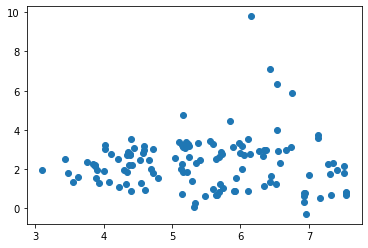

In [29]:
plt.scatter(GDP_happiness_population_df['happiness_score'],GDP_happiness_population_df['PGR'])

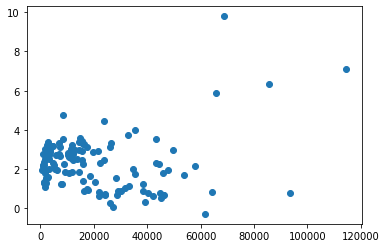

In [30]:
plt.scatter(GDP_happiness_population_df['GDP_per_capita'],GDP_happiness_population_df['PGR'])

0.7239856592641879 9.87180156720124e-22 1140.6632573614886


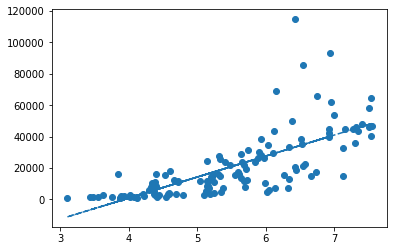

In [31]:
plt.scatter(GDP_happiness_population_df['happiness_score'],GDP_happiness_population_df['GDP_per_capita'])
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(GDP_happiness_population_df['happiness_score'], GDP_happiness_population_df['GDP_per_capita'])
m_fit = m_slope * GDP_happiness_population_df['happiness_score'] + m_int
plt.plot(GDP_happiness_population_df['happiness_score'],m_fit,"--")
print(m_r, m_p, m_std_err )

In [32]:
GDP_happiness_population_df.describe()

,happiness_score,GDP_per_capita,PGR
count,126.000000,126.000000,125.000000
mean,5.477369,20584.455078,2.294348
std,1.122873,20675.988281,1.374724
min,3.098333,700.799988,-0.280699
25%,4.534556,4697.849976,1.326945
50%,5.394333,14507.700195,2.266912
75%,6.343778,29167.949707,2.990147
max,7.548667,114576.796875,9.796447


In [33]:
GDP_happiness_population_df.sort_values

<bound method DataFrame.sort_values of              happiness_score  GDP_per_capita       PGR
country                                               
Switzerland         7.513333    57834.000000  2.172274
Iceland             7.511778    46052.601562  1.795327
Denmark             7.548667    46462.000000  0.665279
Norway              7.541444    64414.601562  0.839369
Canada              7.354444    43447.199219  2.298627
...                      ...             ...       ...
Afghanistan         3.481556     1762.599976  1.813677
Rwanda              3.435000     1834.800049  2.510609
Benin               3.928111     2043.800049  1.304980
Burundi             3.098333      700.799988  1.945425
Togo                3.549667     1497.400024  1.326945

[126 rows x 3 columns]>

,happiness_score,GDP_per_capita,PGR
country,,,
Switzerland,7.513333,57834.000000,2.172274
Iceland,7.511778,46052.601562,1.795327
Denmark,7.548667,46462.000000,0.665279
Norway,7.541444,64414.601562,0.839369
Canada,7.354444,43447.199219,2.298627


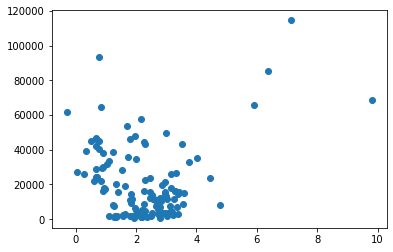

In [34]:
plt.scatter(GDP_happiness_population_df['PGR'],GDP_happiness_population_df['GDP_per_capita'])
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(GDP_happiness_population_df['PGR'], GDP_happiness_population_df['GDP_per_capita'])
m_fit = m_slope * GDP_happiness_population_df['PGR'] + m_int
plt.plot(GDP_happiness_population_df['PGR'],m_fit,"--")
plt.plot(GDP_happiness_population_df['PGR'],m_fit,"--")
GDP_happiness_population_df.head()

In [35]:
GDP_happiness_population_df['PGR']=GDP_happiness_population_df['PGR'].round(2)
GDP_happiness_population_df['GDP_per_capita']=GDP_happiness_population_df['GDP_per_capita'].astype("float64").round(2)
GDP_happiness_population_df['happiness_score']=GDP_happiness_population_df['happiness_score'].round(2)
GDP_happiness_population_df.to_csv('out.csv')

             happiness_score  GDP_per_capita   PGR
country                                           
Denmark                 7.55         46462.0  0.67
Finland                 7.55         40214.2  0.78
Norway                  7.54         64414.6  0.84
Switzerland             7.51         57834.0  2.17
Iceland                 7.51         46052.6  1.80
Netherlands             7.41         47895.4  1.95
Canada                  7.35         43447.2  2.30
Sweden                  7.32         46025.2  0.67
New Zealand             7.31         35578.0  1.73
Australia               7.28         44531.8  2.27


<AxesSubplot:xlabel='country'>

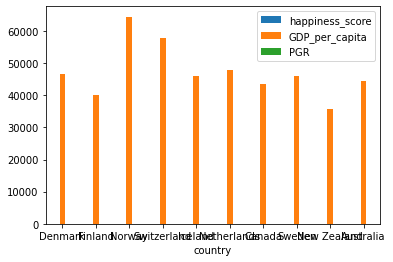

In [69]:
print(GDP_happiness_population_df.nlargest(n=10,columns=["happiness_score"]))
GDP_happiness_population_df.nlargest(n=10,columns=["happiness_score"]).plot.bar(rot=0)


                      happiness_score  GDP_per_capita   PGR
country                                                    
Qatar                            6.43        114576.8  7.12
Luxembourg                       6.94         93370.6  0.79
Singapore                        6.54         85572.4  6.36
Kuwait                           6.15         68896.4  9.80
United Arab Emirates             6.75         65815.0  5.90
Norway                           7.54         64414.6  0.84
Ireland                          6.96         61813.2 -0.28
Switzerland                      7.51         57834.0  2.17
United States                    7.00         53810.6  1.70
Saudi Arabia                     6.38         49632.6  3.00


<AxesSubplot:xlabel='country'>

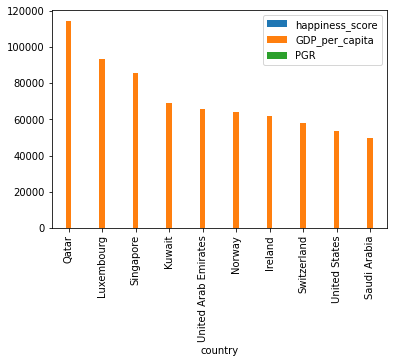

In [75]:

print(GDP_happiness_population_df.nlargest(10, columns=["GDP_per_capita"]))
GDP_happiness_population_df.nlargest(10, columns=["GDP_per_capita"]).plot.bar()


              happiness_score  GDP_per_capita   PGR
country                                            
Burundi                  3.10           700.8  1.95
Niger                    4.11           913.6  2.80
Malawi                   3.87          1148.6  2.20
Liberia                  3.87          1199.4  2.15
Madagascar               3.76          1403.4  2.37
Sierra Leone             4.54          1447.6  1.27
Togo                     3.55          1497.4  1.33
Ethiopia                 4.42          1613.4  2.23
Burkina Faso             4.08          1654.4  1.36
Haiti                    3.89          1655.0  1.96


<AxesSubplot:xlabel='country'>

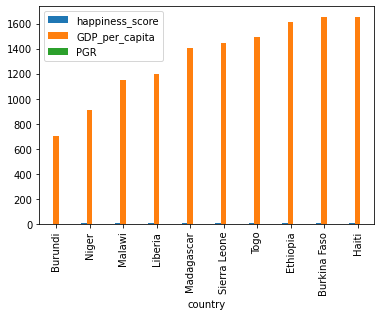

In [77]:

print(GDP_happiness_population_df.nsmallest(10, columns=["GDP_per_capita"]))
GDP_happiness_population_df.nsmallest(10, columns=["GDP_per_capita"]).plot.bar()

                      happiness_score  GDP_per_capita   PGR
country                                                    
Kuwait                           6.15         68896.4  9.80
Qatar                            6.43        114576.8  7.12
Singapore                        6.54         85572.4  6.36
United Arab Emirates             6.75         65815.0  5.90
Jordan                           5.16          8373.2  4.77
Kazakhstan                       5.84         23875.0  4.44
Malta                            6.53         35432.6  4.01
Israel                           7.13         32731.0  3.75
Costa Rica                       7.13         15013.6  3.57
Armenia                          4.40          8441.6  3.56


<AxesSubplot:xlabel='country'>

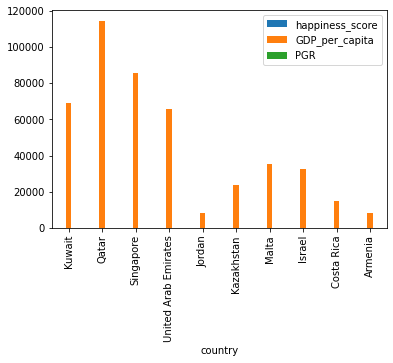

In [76]:

print(GDP_happiness_population_df.nlargest(10, columns=["PGR"]))
GDP_happiness_population_df.nlargest(10, columns=["PGR"]).plot.bar()

In [145]:
#Create a database in postgres

connection_string = "postgres:postgres@localhost:5432/countries_db"
engine = create_engine(f'postgresql://{connection_string}')

In [146]:
GDP_happiness_population_df.to_sql(name='countries', con=engine, if_exists='replace', index=True)
engine.table_names()

C:\Users\igrang\AppData\Local\Temp\ipykernel_42716\7374675.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['countries']